### Under Sampled Data using Smote

In [57]:
import pandas as pd
import seaborn as sns
file = pd.read_csv("data.csv")

In [58]:
file.isnull().sum()


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [59]:
file.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Checking for null values and data shape

In [60]:
print(file.isnull().values.any())
print(file.shape)

False
(6819, 96)


### Ploting bankrupt column

C:\Users\IBRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

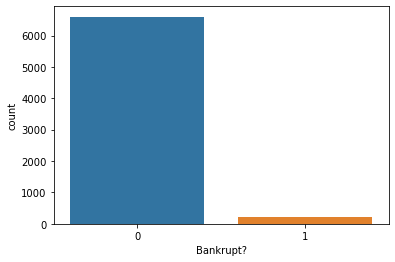

In [61]:
## Data needs to be balanced
sns.countplot(file['Bankrupt?'], label = "Count")

### Data Balancing

#### Under Sampling

In [62]:
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


In [63]:
X = file.iloc[:,1:]
Y = file.iloc[:,0]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [65]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({0: 158, 1: 158})


### Feature Selection using filters

#### Chi2 

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = X_train_under
Y = y_train_under
best = SelectKBest(score_func=chi2,k=20)
fit = best.fit(X,Y) 

In [67]:
dfscore = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(X.columns)

In [68]:
featurescore = pd.concat([dfcol,dfscore], axis = 1)
featurescore.columns = ["feat","Score"]

In [69]:
featurescore

,feat,Score
0,ROA(C) before interest and depreciation befor...,1.419158
1,ROA(A) before interest and % after tax,1.808609
2,ROA(B) before interest and depreciation after...,1.467038
3,Operating Gross Margin,0.010744
4,Realized Sales Gross Margin,0.010570
...,...,...
90,Liability to Equity,0.031630
91,Degree of Financial Leverage (DFL),0.005896
92,Interest Coverage Ratio (Interest expense to ...,0.000192
93,Net Income Flag,0.000000


In [70]:
selectedfeat = featurescore.nlargest(20,"Score")
cols = selectedfeat["feat"]
print(cols)

48           Fixed Assets Turnover Frequency
71                 Quick Asset Turnover Rate
11     Research and development expense rate
29                     Net Value Growth Rate
33                               Quick Ratio
86                 Total assets to GNP price
75                    Fixed Assets to Assets
28                   Total Asset Growth Rate
50                        Revenue per person
58                    Cash/Current Liability
47           Inventory Turnover Rate (times)
52                Allocation rate per person
13       Interest-bearing debt interest rate
70               Current Asset Turnover Rate
73                        Cash Turnover Rate
62               Inventory/Current Liability
45              Accounts Receivable Turnover
35                Total debt/Total net worth
46                   Average Collection Days
10                    Operating Expense Rate
Name: feat, dtype: object


## KNN

In [43]:
from ipynb.fs.full.LearningAlg import *

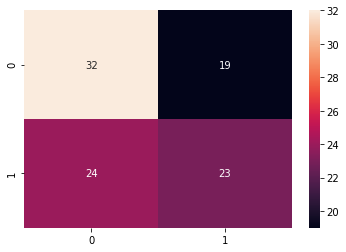

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        51
           1       0.55      0.49      0.52        47

    accuracy                           0.56        98
   macro avg       0.56      0.56      0.56        98
weighted avg       0.56      0.56      0.56        98



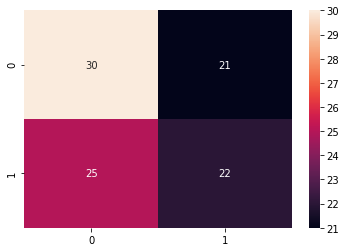

              precision    recall  f1-score   support

           0       0.55      0.59      0.57        51
           1       0.51      0.47      0.49        47

    accuracy                           0.53        98
   macro avg       0.53      0.53      0.53        98
weighted avg       0.53      0.53      0.53        98



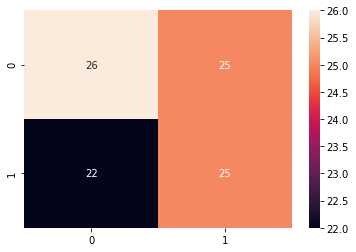

              precision    recall  f1-score   support

           0       0.54      0.51      0.53        51
           1       0.50      0.53      0.52        47

    accuracy                           0.52        98
   macro avg       0.52      0.52      0.52        98
weighted avg       0.52      0.52      0.52        98



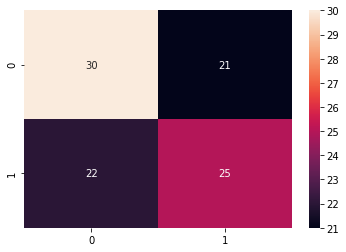

              precision    recall  f1-score   support

           0       0.58      0.59      0.58        51
           1       0.54      0.53      0.54        47

    accuracy                           0.56        98
   macro avg       0.56      0.56      0.56        98
weighted avg       0.56      0.56      0.56        98



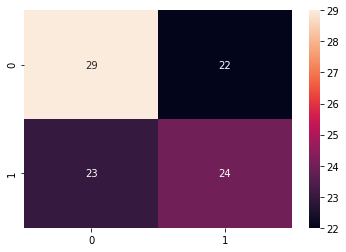

              precision    recall  f1-score   support

           0       0.56      0.57      0.56        51
           1       0.52      0.51      0.52        47

    accuracy                           0.54        98
   macro avg       0.54      0.54      0.54        98
weighted avg       0.54      0.54      0.54        98



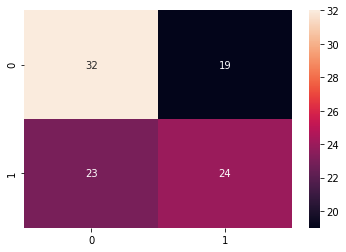

              precision    recall  f1-score   support

           0       0.58      0.63      0.60        51
           1       0.56      0.51      0.53        47

    accuracy                           0.57        98
   macro avg       0.57      0.57      0.57        98
weighted avg       0.57      0.57      0.57        98



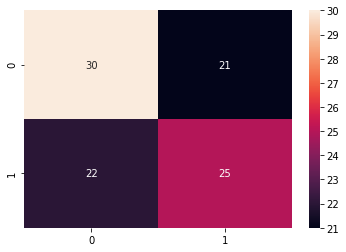

              precision    recall  f1-score   support

           0       0.58      0.59      0.58        51
           1       0.54      0.53      0.54        47

    accuracy                           0.56        98
   macro avg       0.56      0.56      0.56        98
weighted avg       0.56      0.56      0.56        98



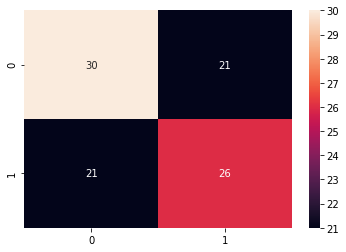

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        51
           1       0.55      0.55      0.55        47

    accuracy                           0.57        98
   macro avg       0.57      0.57      0.57        98
weighted avg       0.57      0.57      0.57        98



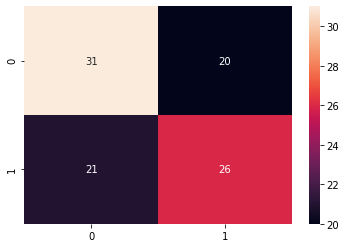

              precision    recall  f1-score   support

           0       0.60      0.61      0.60        51
           1       0.57      0.55      0.56        47

    accuracy                           0.58        98
   macro avg       0.58      0.58      0.58        98
weighted avg       0.58      0.58      0.58        98



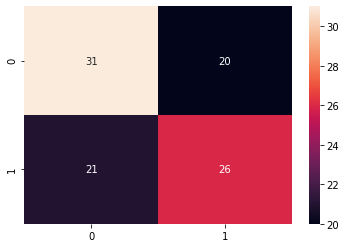

              precision    recall  f1-score   support

           0       0.60      0.61      0.60        51
           1       0.57      0.55      0.56        47

    accuracy                           0.58        98
   macro avg       0.58      0.58      0.58        98
weighted avg       0.58      0.58      0.58        98



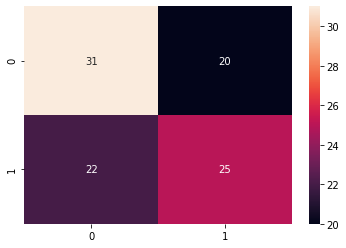

              precision    recall  f1-score   support

           0       0.58      0.61      0.60        51
           1       0.56      0.53      0.54        47

    accuracy                           0.57        98
   macro avg       0.57      0.57      0.57        98
weighted avg       0.57      0.57      0.57        98



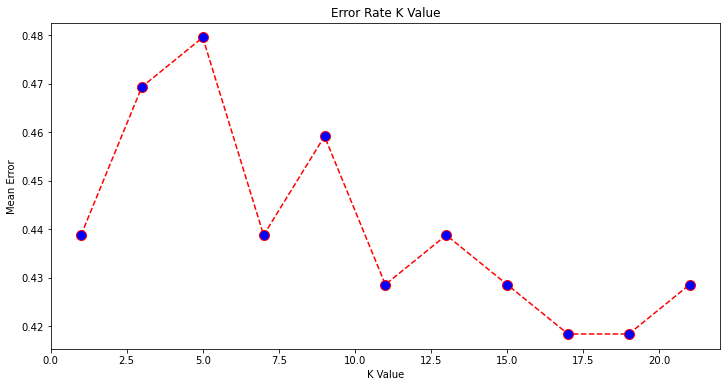

In [44]:
KNNclassifier(X_train_under[cols],y_train_under)


In [45]:
from sklearn import preprocessing

In [46]:
X_train_norm = preprocessing.normalize(X_train_under[cols],norm = 'l2')


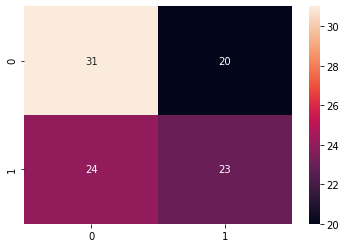

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        51
           1       0.53      0.49      0.51        47

    accuracy                           0.55        98
   macro avg       0.55      0.55      0.55        98
weighted avg       0.55      0.55      0.55        98



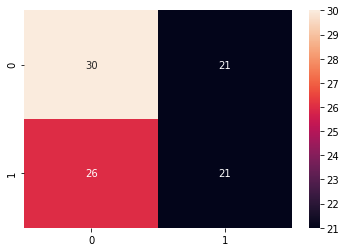

              precision    recall  f1-score   support

           0       0.54      0.59      0.56        51
           1       0.50      0.45      0.47        47

    accuracy                           0.52        98
   macro avg       0.52      0.52      0.52        98
weighted avg       0.52      0.52      0.52        98



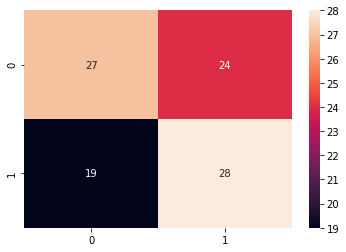

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        51
           1       0.54      0.60      0.57        47

    accuracy                           0.56        98
   macro avg       0.56      0.56      0.56        98
weighted avg       0.56      0.56      0.56        98



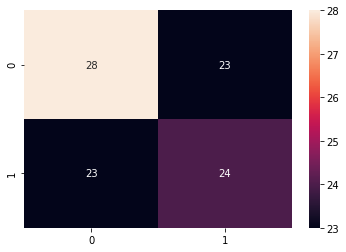

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        51
           1       0.51      0.51      0.51        47

    accuracy                           0.53        98
   macro avg       0.53      0.53      0.53        98
weighted avg       0.53      0.53      0.53        98



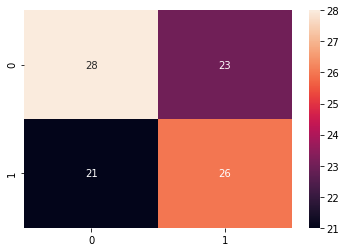

              precision    recall  f1-score   support

           0       0.57      0.55      0.56        51
           1       0.53      0.55      0.54        47

    accuracy                           0.55        98
   macro avg       0.55      0.55      0.55        98
weighted avg       0.55      0.55      0.55        98



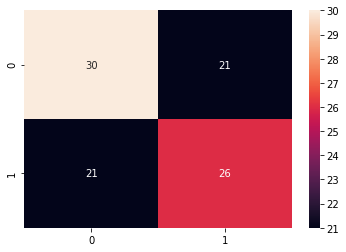

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        51
           1       0.55      0.55      0.55        47

    accuracy                           0.57        98
   macro avg       0.57      0.57      0.57        98
weighted avg       0.57      0.57      0.57        98



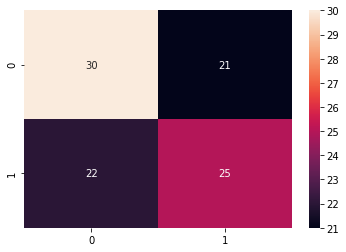

              precision    recall  f1-score   support

           0       0.58      0.59      0.58        51
           1       0.54      0.53      0.54        47

    accuracy                           0.56        98
   macro avg       0.56      0.56      0.56        98
weighted avg       0.56      0.56      0.56        98



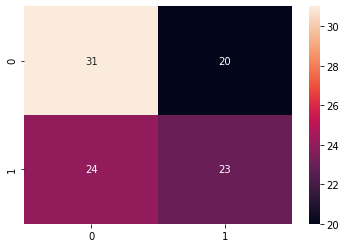

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        51
           1       0.53      0.49      0.51        47

    accuracy                           0.55        98
   macro avg       0.55      0.55      0.55        98
weighted avg       0.55      0.55      0.55        98



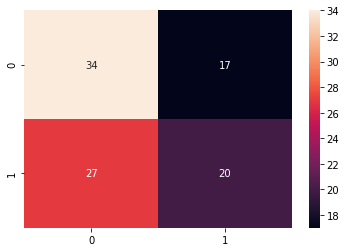

              precision    recall  f1-score   support

           0       0.56      0.67      0.61        51
           1       0.54      0.43      0.48        47

    accuracy                           0.55        98
   macro avg       0.55      0.55      0.54        98
weighted avg       0.55      0.55      0.54        98



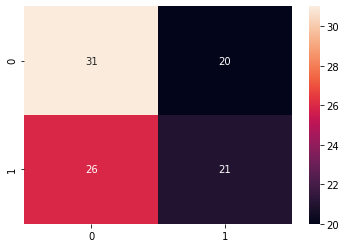

              precision    recall  f1-score   support

           0       0.54      0.61      0.57        51
           1       0.51      0.45      0.48        47

    accuracy                           0.53        98
   macro avg       0.53      0.53      0.53        98
weighted avg       0.53      0.53      0.53        98



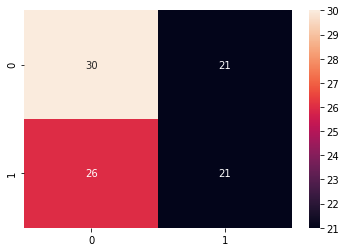

              precision    recall  f1-score   support

           0       0.54      0.59      0.56        51
           1       0.50      0.45      0.47        47

    accuracy                           0.52        98
   macro avg       0.52      0.52      0.52        98
weighted avg       0.52      0.52      0.52        98



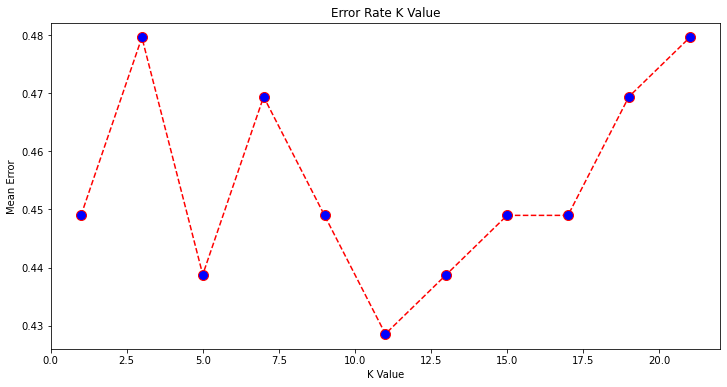

In [47]:
KNNclassifier(X_train_norm,y_train_under)

## SVM

In [48]:
from ipynb.fs.full.LearningAlg import *

In [49]:
SVMalg(X_train_under[cols],y_train_under)

[[30 21]
 [17 30]]
              precision    recall  f1-score   support

           0       0.64      0.59      0.61        51
           1       0.59      0.64      0.61        47

    accuracy                           0.61        98
   macro avg       0.61      0.61      0.61        98
weighted avg       0.61      0.61      0.61        98



## Decision Trees Classifier

In [50]:
from ipynb.fs.full.LearningAlg import *

Accuracy: 0.8061224489795918


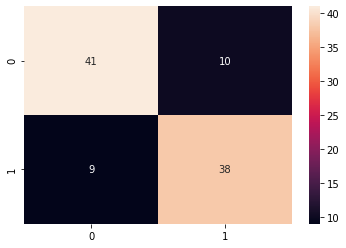

In [51]:
decisionTrees(X_train_under,y_train_under)

Accuracy: 0.6326530612244898


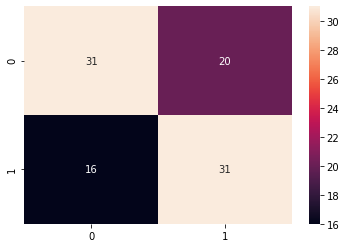

In [52]:
decisionTrees(X_train_norm,y_train_under)

Accuracy: 0.9530791788856305


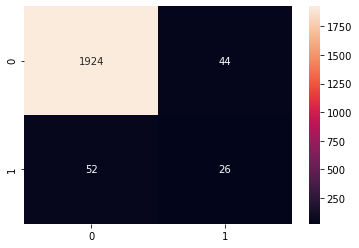

In [53]:
X = file.iloc[:,1:]
Y = file.iloc[:,0]

decisionTrees(X,Y)

#### Using MLP Classifier

In [71]:
MLPclass(X_train_SMOTE[cols],y_train_SMOTE)

NameError: name 'MLPclass' is not defined

#### Using Extra Trees Classifier

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [86]:
print(model.feature_importances_)

[0.01651462 0.02019071 0.0197098  0.00850743 0.00787467 0.00794549
 0.00903171 0.00817162 0.01114939 0.01055556 0.00815922 0.0092795
 0.00794616 0.01357002 0.00571716 0.01125533 0.00979112 0.01240042
 0.02008936 0.0066327  0.00717639 0.00932334 0.0121159  0.00785511
 0.00880108 0.00635815 0.0062878  0.00878247 0.00973685 0.00974711
 0.00912197 0.00806803 0.00887178 0.00826521 0.01256821 0.01246247
 0.01734521 0.02198781 0.00784515 0.01969526 0.00971524 0.00829185
 0.01573032 0.01007033 0.00835469 0.00671845 0.00945181 0.00793678
 0.01232114 0.0080724  0.00990674 0.0090156  0.01156938 0.01436807
 0.00889821 0.00855802 0.01037338 0.0083375  0.01311624 0.0122674
 0.00854601 0.01029319 0.00808475 0.00885938 0.01216153 0.01174899
 0.00751452 0.01326186 0.00992044 0.00964266 0.00944449 0.00920534
 0.00925645 0.00838147 0.00818245 0.01092633 0.0086751  0.01198821
 0.01203859 0.007773   0.00639568 0.00816855 0.00747494 0.0110635
 0.00573154 0.02462571 0.01079635 0.01004133 0.00770261 0.0191362

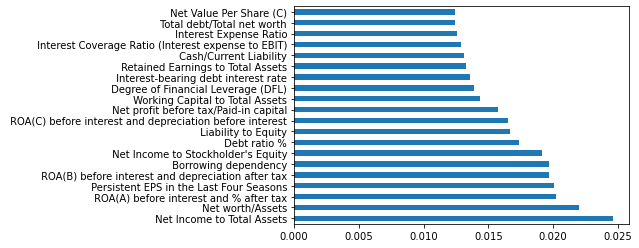

In [87]:
fimport = pd.Series(model.feature_importances_,index = X.columns)
fimport.nlargest(20).plot(kind = 'barh')
plt.show()
cols = fimport.nlargest(20).index

## KNN

In [25]:
from ipynb.fs.full.LearningAlg import *

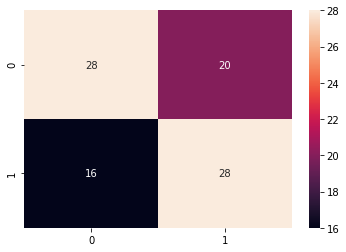

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        48
           1       0.58      0.64      0.61        44

    accuracy                           0.61        92
   macro avg       0.61      0.61      0.61        92
weighted avg       0.61      0.61      0.61        92



In [30]:
KNNclassifier(X_train_SMOTE[cols], y_train_SMOTE)

## Decision Trees Classifier

Accuracy: 0.8020833333333334


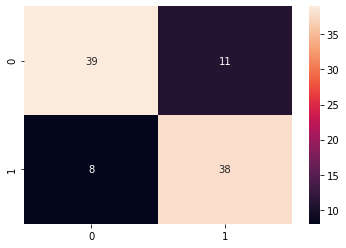

In [88]:
decisionTrees(X_train_under[cols],y_train_under)

Accuracy: 0.9516129032258065


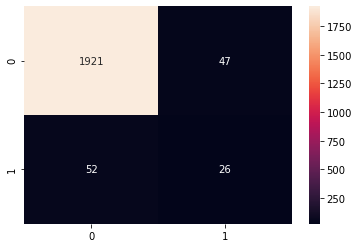

In [89]:
X = file.iloc[:,1:]
Y = file.iloc[:,0]
decisionTrees(X,Y)

## SVM

In [28]:
from ipynb.fs.full.LearningAlg import *

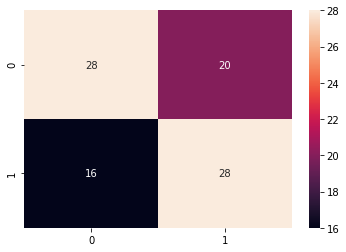

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        48
           1       0.58      0.64      0.61        44

    accuracy                           0.61        92
   macro avg       0.61      0.61      0.61        92
weighted avg       0.61      0.61      0.61        92



In [29]:
SVMalg(X_train_under[cols], y_train_under)